# Sentinel 2
### Nori (Eleonora) Parelius
### 18.9.2024

# Sentinel 2
* go to [wiki page on Sentinelc2 at Copernicus](https://sentiwiki.copernicus.eu/web/s2-mission)
* skim for 5 minutes and try to identify 3-5 key characteristics of Sentinel 2
* optionally, identify one question you think the text can answer

# Sentinel 2
* Part of European Space Agency's (ESA) Copernicus programme
* Twin sattelites
    * Sentinel 2A since 23. June 2015
    * Sentinel 2B since 7. March 2017
    * Sentinel 2C, 5.9.2024 -- to replace 2A
    
![Sentinel 2, image from Copernicus](images/sentinelsat.jpg)

## Coverage and time resolution
* At same angle every 5 days (10 days for same sattelite)
* Between $56^{\circ}$ S and $84^{\circ}$ degrees N
* Coast up to 20 km from land
* Islands over $100\ \rm{km^2}$
* Antarctica on demand
* Sun synchronous orbit at 786 km, 10:30 am descending node
![](images/sentinelcoverage.png)
Image from Copernicus

## Sentinel 2 multispectral sensor
* 13 spectral bands in VIS, VNIR, SWIR
* Spatial resolution 10, 20, 60 m
* Push-broom, swath of 290 km
![](images/sentinelbands.jpg)

Image from eoportal.org


## Temporal offset
* Spectral bands image the surface at different times
* This offset creates "rainbows" for moving things
![Temporal offset in Sentinel 2 images](images/sentinelRainbow.jpg)

Commercial Vehicle Traffic Detection from Satellite Imagery with Deep Learning, 2021
Blattner, Moritz and Mommert, Michael and Borth, Damian, 
https://www.climatechange.ai/papers/icml2021/19


## Applications
* Agriculture and forestry
* Disaster mapping 

## Sentinel tiles
![](images/S2_granules_tiles.jpg)

Image from eox.at 

## Products
All free!

* Level-1B
    * Top-of-atmosphere calibrated radiances in sensor geometry
    * Include radiometric corrections
    * Not orthorectified
    * Come in granules
* Level-1C
    * Top-of-atmosphere reflectance
    * Radiometrically and geometrically corrected
    * Orthorectified and spatially coregistered on a global reference system. 
    * Come in tiles
* Level-2A
    * Bottom-of-atmosphere (Surface) reflectance
    * Otherwise same as L-1C

## Examples

### RGB

![RGB image example](images/sentinelRGB.png)

from gisgeography.com

### IR (NIR, R, G)

Picks up chlorophyll in red, man-made in white

![Sentinel IR](images/sentinelIR.jpg)

from gisgeography.com

### SWIR (B12, B8A, B4)
Vegetation in green and earth in brown

![Sentinel SWIR](images/sentinelsSWIR.png)

from gisgeography.com

### Bathymetry (B4, B3, B1) (R, G, b)
b shows sediments in the water

![Sentinel 2 bathymetry](images/sentinelBathymetry.png)

from gisgeography.com

### NDVI index
$$NDVI = \frac{NIR-RED}{NIR+RED}$$

![NDVI image example](images/sentinelNDVI.jpg)

from gisgeography.com

### NDWI index
$$NDWI = \frac{B8A\ (NIR)-B11\ (SWIR)}{B8A+B11}$$

![NDWI image example](images/sentinelNDWI.png)

from gisgeography.com

# Sentinel 2 - Searching, downloading, loading up and working with it in Python

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm 


In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Area of interest

First half of 2022, there was a drought in Norway, so we could expect that the vegetation in 2022 wasn't as healthy as usual. This should show up by NDVI being generally lower in 2022 than in 2021. 

### Pick your area
I am picking my home, you can pick wherever you want. 

### Go to Copernicus Browser, define area and download
* [Browser](https://browser.dataspace.copernicus.eu/?zoom=5&lat=50.16282&lng=20.78613&themeId=DEFAULT-THEME&visualizationUrl=U2FsdGVkX189mCFCYnDD3UnASaMbX0sftnlKaN3uO6insQGa7BZae5N4qzS8XaMSkDRUDKafY42Hj90c5dZ%2F2RTG0v7Bn8WHkn9b6DBcb4hPVVHLGwPtC3fq3FPlMZac&datasetId=S2_L2A_CDAS&demSource3D=%22MAPZEN%22&cloudCoverage=30&dateMode=SINGLE)
* Use the *Search* tab and find one image from May 2021 and one from May 2022
* Download the tile

## Check the files
Where are the images?

## Let's load it

In [31]:
# Rewrite these to fit your images
may_2021_r10 = 'S2B_MSIL2A_20210530T104619_N0500_R051_T32VPM_20230228T112003.SAFE/GRANULE/L2A_T32VPM_A022099_20210530T104621/IMG_DATA/R10m/'
may_2022_r10 = 'S2A_MSIL2A_20220517T103631_N0400_R008_T32VPM_20220517T161111.SAFE/GRANULE/L2A_T32VPM_A036041_20220517T103708/IMG_DATA/R10m/'

In [32]:
import rasterio

# Open b2, b3 and b4
# Rewrite these to fit your images
# 2021
m2021_band2=rasterio.open(may_2021_r10 + "T32VPM_20210530T104619_B02_10m.jp2")
m2021_band3=rasterio.open(may_2021_r10 + "T32VPM_20210530T104619_B03_10m.jp2")
m2021_band4=rasterio.open(may_2021_r10 + "T32VPM_20210530T104619_B04_10m.jp2")
m2021_band8=rasterio.open(may_2021_r10 + "T32VPM_20210530T104619_B08_10m.jp2")

2022
m2022_band2=rasterio.open(may_2022_r10 + "T32VPM_20220517T103631_B02_10m.jp2")
m2022_band3=rasterio.open(may_2022_r10 + "T32VPM_20220517T103631_B03_10m.jp2")
m2022_band4=rasterio.open(may_2022_r10 + "T32VPM_20220517T103631_B04_10m.jp2")
m2022_band8=rasterio.open(may_2022_r10 + "T32VPM_20220517T103631_B08_10m.jp2")

# Check the properties of one of the bands
print(m2021_band2.profile)
# You can check the others too

{'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 1, 'crs': CRS.from_epsg(32632), 'transform': Affine(10.0, 0.0, 600000.0,
       0.0, -10.0, 6700020.0), 'blockxsize': 1024, 'blockysize': 1024, 'tiled': True}


## Plotting the bands

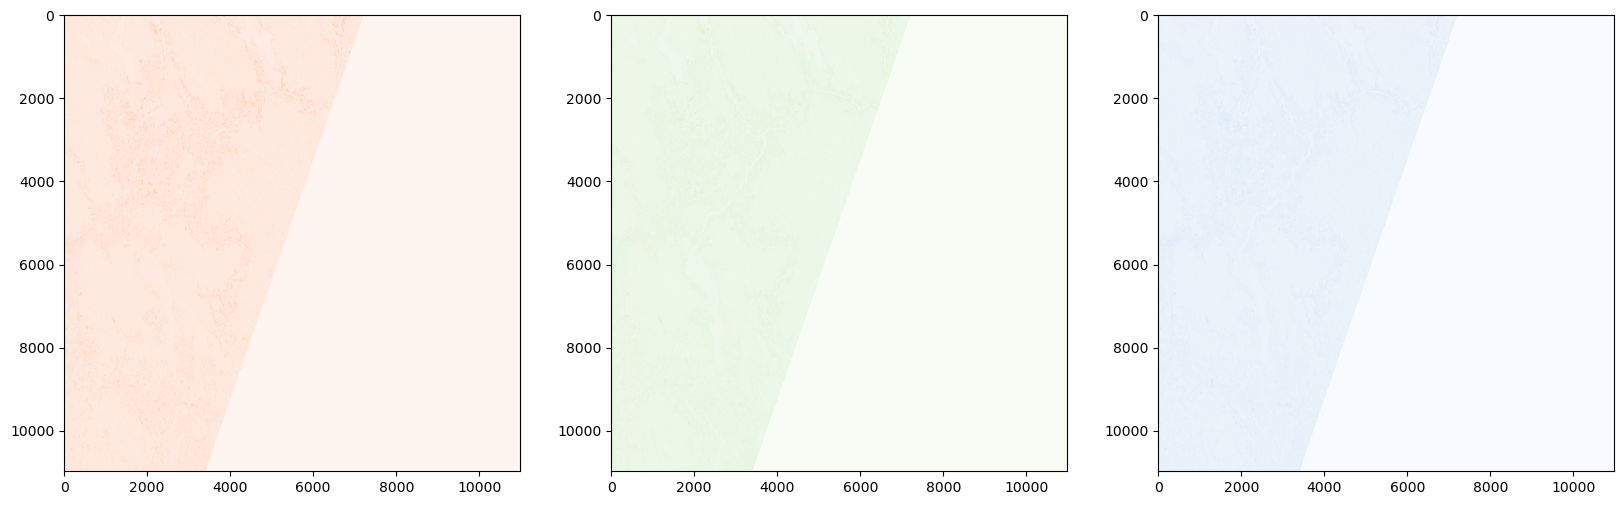

In [33]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(m2021_band4.read(1), cmap='Reds')
ax1 = fig.add_subplot(1,3,2)
ax1.imshow(m2021_band3.read(1), cmap='Greens')
ax1 = fig.add_subplot(1,3,3)
ax1.imshow(m2021_band2.read(1), cmap='Blues')

## Plotting the RGB
That comes with the granule

{'driver': 'JPEG', 'dtype': 'uint8', 'nodata': None, 'width': 343, 'height': 343, 'count': 3, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0), 'blockysize': 1, 'tiled': False, 'compress': 'jpeg', 'interleave': 'pixel', 'photometric': 'ycbcr'}


c:\Users\ELPAR\AppData\Local\miniconda3\envs\Sentinel2Intro\Lib\site-packages\rasterio\__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


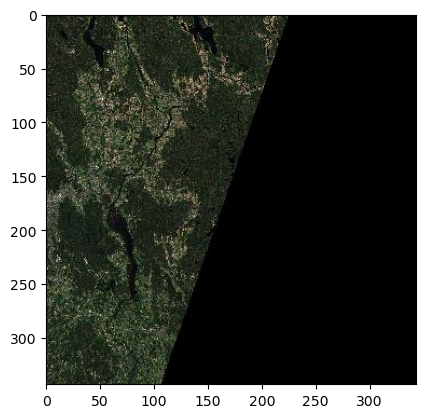

<Axes: >

In [14]:
from rasterio.plot import show
RGB_im = rasterio.open('S2B_MSIL2A_20210530T104619_N0500_R051_T32VPM_20230228T112003.SAFE/S2B_MSIL2A_20210530T104619_N0500_R051_T32VPM_20230228T112003-ql.jpg')
print(RGB_im.profile)
show(RGB_im)

## Limiting the area

### Define the polygon

In [17]:
import shapely
import pyproj
from shapely.ops import transform

# bounding box coordinates of the area of interest in WGS84 CRS, [minx, miny, maxx, maxy]
nes_bbox_coords = [60, 11.35, 60.21, 11.8] # find your

# Let's create a shapely geometry of the bounding box
nes_polygon = shapely.geometry.box(*nes_bbox_coords) # what happens if you remove the asterisk?

# Get it into the right coordinate system
project = pyproj.Transformer.from_proj(
    pyproj.Proj('epsg:4326'), # source coordinate system
    pyproj.Proj('epsg:32632')) # destination coordinate system ! make sure you change to yours

nes_polygon2 = transform(project.transform, nes_polygon)  # apply projection

### Crop all the bands and save as one tif

In [29]:
import rasterio.mask
out_band2, out_transform = rasterio.mask.mask(m2021_band2, [nes_polygon2], crop=True)
out_meta = m2021_band2.meta

out_meta.update({"driver": "GTiff",
                 "count" : 4,
                 "height": out_band2.shape[1],
                 "width": out_band2.shape[2],
                 "transform": out_transform})

out_band3, out_transform = rasterio.mask.mask(m2021_band3, [nes_polygon2], crop=True)
out_band4, out_transform = rasterio.mask.mask(m2021_band4, [nes_polygon2], crop=True)
out_band8, out_transform = rasterio.mask.mask(m2021_band8, [nes_polygon2], crop=True)

with rasterio.open("may2021_r10_masked.tif", "w", **out_meta) as dest:
    dest.write(out_band2.squeeze(),1)
    dest.write(out_band3.squeeze(),2)
    dest.write(out_band4.squeeze(),3)
    dest.write(out_band8.squeeze(),4)

In [35]:
out_band2, out_transform = rasterio.mask.mask(m2022_band2, [nes_polygon2], crop=True)
out_meta = m2022_band2.meta

out_meta.update({"driver": "GTiff",
                 "count" : 4,
                 "height": out_band2.shape[1],
                 "width": out_band2.shape[2],
                 "transform": out_transform})

out_band3, out_transform = rasterio.mask.mask(m2022_band3, [nes_polygon2], crop=True)
out_band4, out_transform = rasterio.mask.mask(m2022_band4, [nes_polygon2], crop=True)
out_band8, out_transform = rasterio.mask.mask(m2022_band8, [nes_polygon2], crop=True)

with rasterio.open("may2022_r10_masked.tif", "w", **out_meta) as dest:
    dest.write(out_band2.squeeze(),1)
    dest.write(out_band3.squeeze(),2)
    dest.write(out_band4.squeeze(),3)
    dest.write(out_band8.squeeze(),4)

## Let's plot it as RGB

<Axes: >

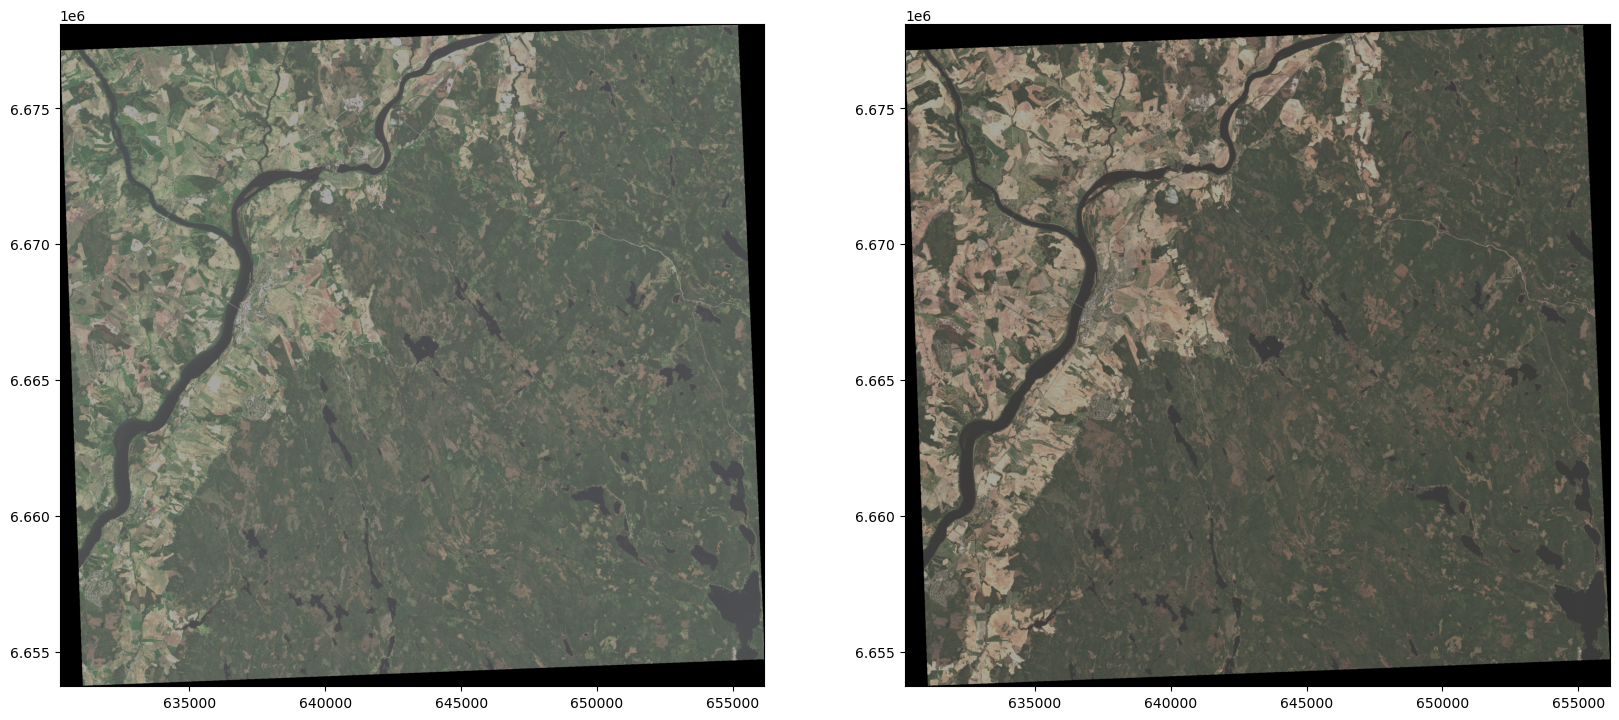

In [62]:
from skimage import exposure
# Transpose and rescale the image 
img1 = rasterio.open("may2021_r10_masked.tif")
image1 = np.array([img1.read(3), img1.read(2), img1.read(1)]).transpose(1,2,0)
p2, p98 = np.percentile(image1, (2,98))
image1 = exposure.rescale_intensity(image1, in_range=(p2, p98)) / 100000

# Transpose and rescale the image 
img2 = rasterio.open("may2022_r10_masked.tif")
image2 = np.array([img2.read(3), img2.read(2), img2.read(1)]).transpose(1,2,0)
p2, p98 = np.percentile(image2, (2,98))
image2 = exposure.rescale_intensity(image2, in_range=(p2, p98)) / 100000

# Plot the resulting image
fig, ax = plt.subplots(1,2, figsize=(20,12))
show(image1.transpose(2,0,1), transform=img1.transform, ax=ax[0])
show(image2.transpose(2,0,1), transform=img2.transform, ax=ax[1])

## NDVI images

In [46]:
print(img1.profile)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 2593, 'height': 2436, 'count': 4, 'crs': CRS.from_epsg(32632), 'transform': Affine(10.0, 0.0, 630220.0,
       0.0, -10.0, 6678090.0), 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}


In [74]:
red_2021 = img1.read(3)/10000
red_2022 = img2.read(3)/10000
red_2021[red_2021 < 0] = 0
red_2021[red_2021 > 1] = 1
red_2022[red_2022 < 0] = 0
red_2022[red_2022 > 1] = 1

print(np.unique(red_2022))
print(np.unique(red_2021))

nir_2021 = (img1.read(4))/10000 +0.0001
nir_2022 = (img2.read(4))/10000 +0.0001
nir_2021[nir_2021 < 0] = 0
nir_2021[nir_2021 > 1] = 1
nir_2022[nir_2022 < 0] = 0
nir_2022[nir_2022 > 1] = 1
print(np.unique(nir_2022))
print(np.unique(nir_2021))

# Then we can calculate the NDVI
ndvi_2021 = (nir_2021-red_2021)/(nir_2021+red_2021)
ndvi_2022 = (nir_2022-red_2022)/(nir_2022+red_2022)


[0.     0.0956 0.0976 ... 0.892  0.9072 1.    ]
[0.     0.0987 0.0988 ... 0.8392 0.8456 0.884 ]
[1.000e-04 9.750e-02 9.770e-02 ... 9.729e-01 9.809e-01 1.000e+00]
[1.000e-04 9.740e-02 9.810e-02 ... 8.273e-01 8.961e-01 9.425e-01]


In [75]:
print(np.unique(ndvi_2021))

[-0.99816007 -0.99815838 -0.99814986 ...  0.73190471  0.73232437
  1.        ]


0.38348464935824844
0.35750673491515556


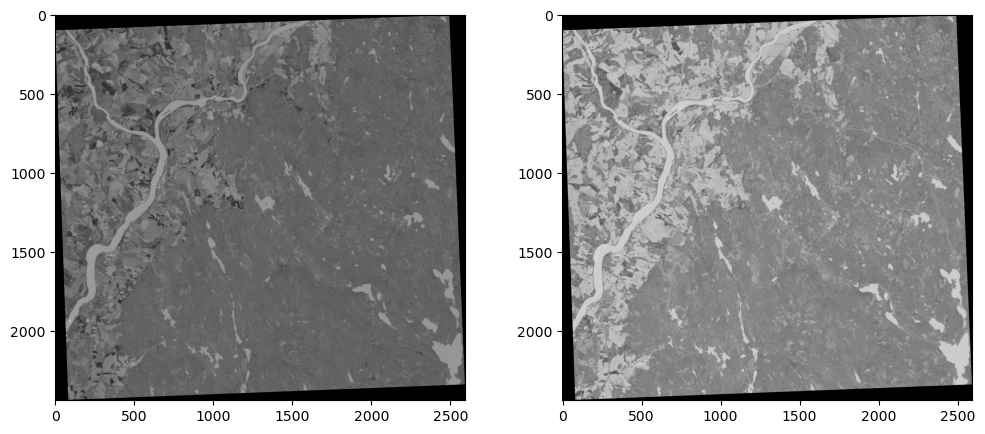

In [77]:
# And let's plot the NDVI in grayscale
# Higher value means lighter color

print(ndvi_2021.mean())
print(ndvi_2022.mean())

fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].imshow(ndvi_2021, cmap='Grays')
ax[1].imshow(ndvi_2022, cmap='Grays')

## Let's look at the difference

We expect the health of the vegetation to be better in 2021, because of the drought in 2022. The NDVI should then be higher for 2021 than for 2022.

We should then expect the difference ndvi_2021 - ndvi_2022 to be mostly positive. 

Let's check if that is the case. 

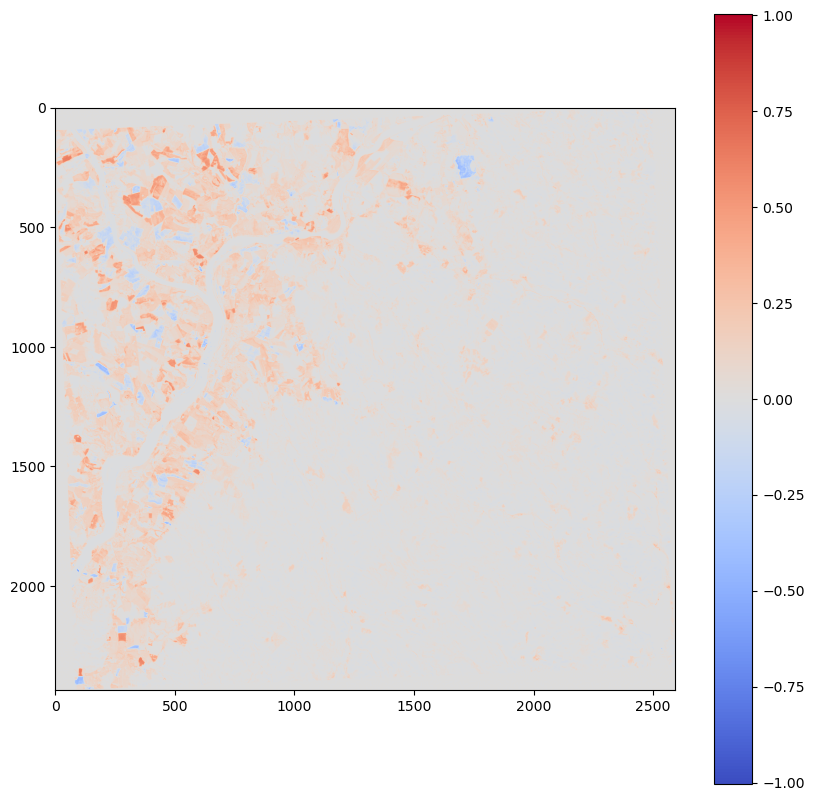

In [78]:
# Plotting the NDVI difference

diff = ndvi_2021 - ndvi_2022
fig, ax = plt.subplots(1, figsize=(10,10))
pic = ax.imshow(diff, norm=matplotlib.colors.CenteredNorm(),cmap = cm.coolwarm)
fig.colorbar(pic, ax=ax)

## Save the NDVI difference as a Geotiff

In [83]:
# Open one of the orginal geotiffs, so we can copy the metadata from it
with rasterio.open('may2021_r10_masked.tif') as src:
    out_image = diff
    out_meta = src.meta.copy()
    # Update the metadata that are different for our new image
    out_meta.update({
        "driver": "GTiff",
        "count": 1, #only one band instead of 12
        "dtype": "float64", #float instead of int
    })
# Use rasterio to write the numpy array into a geotiff 
# using the defined metadata
with rasterio.open("NDVI_diff.tiff", "w", **out_meta) as dest:
    dest.write(diff, indexes=1)

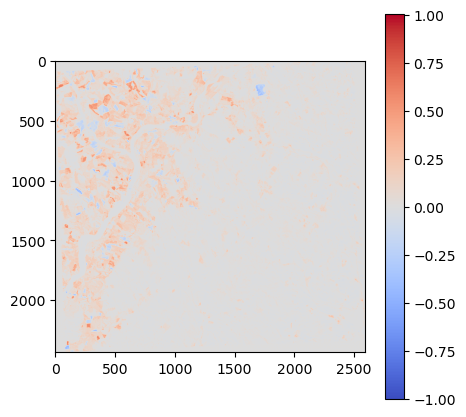

In [84]:
diff_again = rasterio.open("NDVI_diff.tiff").read(1)
fig, ax = plt.subplots(1, figsize=(5,5))
pic = ax.imshow(diff_again, norm=matplotlib.colors.CenteredNorm(),cmap = cm.coolwarm)
fig.colorbar(pic, ax=ax)
